## Backpropagation

### Derivation

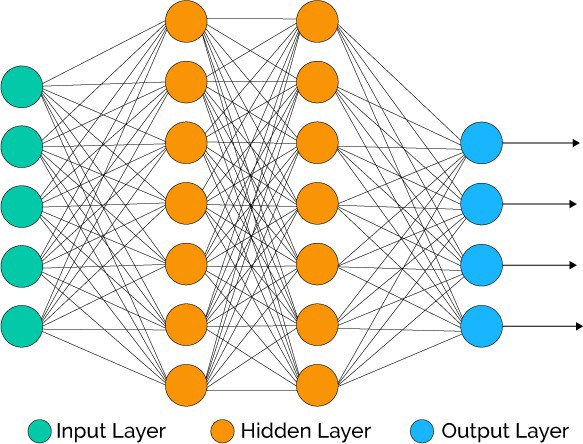

Image from [here](https://towardsdatascience.com/machine-learning-fundamentals-ii-neural-networks-f1e7b2cb3eef)

In order to run SGD, for a single observation $(x, y)$ we need to find the derivatives of the cost function $C$ with respect to network weights $W^{(i)}$. 

First we write down the feed forward network: 

\begin{eqnarray*}
z^{(1)} &=& W^{(1)}x\\
a^{(1)} &=& f^{(1)}(z^{(1)}) = f^{(1)}(W^{(1)}x)\\
\\
z^{(2)} &=& W^{(2)}a^{(1)}\\
a^{(2)} &=& f^{(2)}(z^{(2)}) = f^{(2)}(W^{(2)}a^{(1)})\\
\\
z^{(3)} &=& W^{(3)}a^{(2)}\\
a^{(3)} &=& f^{(3)}(z^{(3)}) = f^{(3)}(W^{(3)}a^{(2)})\\
\end{eqnarray*}


There is another common formulation that uses $z = Wx+b$ instead of just $Wx$, which is equivalent to the above if in each input and hidden layer the last element of $f^{(i)}$ is set to the constant function 1 instead of the sigmoid function. Below we will follow this setting. 

The cost function is $C(y, f^{(3)}(W^{(3)} f^{(2)}(W^{(2)} f^{(1)}(W^{(1)} x ) ) ))$, and its derivative with respect to $x$ is 

$$
\frac{dC}{dx} = \frac{dC}{da^{(3)}} \cdot \frac{da^{(3)}}{dz^{(3)}} \cdot \frac{dz^{(3)}}{da^{(2)}} \cdot \frac{da^{(2)}}{dz^{(2)}} \cdot \frac{dz^{(2)}}{da^{(1)}} \cdot \frac{da^{(1)}}{dz^{(1)}} \cdot \frac{dz^{(1)}}{dx}, 
$$

each term of which is a total derivative. Recall that the total derivative of $f: \mathbb R^m \rightarrow \mathbb R^n$ is defined as the linear map $df_a$ such that

$$
\lim_{x\rightarrow a}\frac{\Vert f(x) - f(a) - df_a(x-a)\Vert}{\Vert x-a \Vert} = 0. 
$$

The matrix form of this linear map is of size $n\times m$.

To understand terms of the form $da^{(i)}/dz^{(i)}$ (the 2nd, 4th and 6th total derivatives on the right hand side) first note that $f^{(i)}$ is an $\mathbb R^n\rightarrow\mathbb R^n$ function, $n$ the number of layers in the $i$th layer (layer is zero indexed). For example for the output layer $f^{(3)}$ is $\mathbb R^4\rightarrow\mathbb R^4$. Thus the total derivative $da^{(3)}/dz^{(3)}$ is of size $4\times 4$. Since the activation function is applied element by element, the $z^{(3)}_i$ has no impact on $a^{(3)}_j$ if $i\neq j$. Thus the total derivative is a diagonal matrix

$$
\frac{da^{(3)}}{dz^{(3)}} = \begin{pmatrix}
(f_1^{(3)})^\prime(z^{(3)}_1) &&&\\
& (f_2^{(3)})^\prime(z^{(3)}_2) &&\\
&& (f_3^{(3)})^\prime(z^{(3)}_3) &\\
&&& (f_4^{(3)})^\prime(z^{(3)}_4)
\end{pmatrix}_{4\times 4}, 
$$

where $f_j^{(3)}$ is the element function in $f^{(3)}$. From now on we denote this diagonal matrix by $(f^{(3)})^\prime$ for simplicity. 
The hidden layers have different total derivatives. Since the last element functions are set to a constant 1, the last element of the total derivative matrix is 0, that is 

$$
\frac{da^{(2)}}{dz^{(2)}} = \begin{pmatrix}
(f_1^{(2)})^\prime(z^{(2)}_1) &&&&&&\\
& (f_2^{(2)})^\prime(z^{(2)}_2) &&&&&\\
&& (f_3^{(2)})^\prime(z^{(2)}_3) &&&&\\
&&& (f_4^{(2)})^\prime(z^{(2)}_4) &&&\\
&&&& (f_5^{(2)})^\prime(z^{(2)}_5) &&\\
&&&&& (f_6^{(2)})^\prime(z^{(2)}_6) &\\
&&&&&& 0
\end{pmatrix}_{7\times 7}, 
$$

and same for $da^{(1)}/dz^{(1)}$. We denote these matrices by $(f^{(2)})^\prime$ and $(f^{(1)})^\prime$. 


Terms of the form $dz^{(i)}/da^{(i-1)}$ (the 3rd, 5th, and 7th terms on the right hand side) is obvious: It is simply $W^{(i)}$, and the complete total derivative can be written as 

\begin{eqnarray*}
\frac{dC}{dx} &=& \frac{dC}{da^{(3)}} \cdot \frac{da^{(3)}}{dz^{(3)}} \cdot \frac{dz^{(3)}}{da^{(2)}} \cdot \frac{da^{(2)}}{dz^{(2)}} \cdot \frac{dz^{(2)}}{da^{(1)}} \cdot \frac{da^{(1)}}{dz^{(1)}} \cdot \frac{dz^{(1)}}{dx}\\\\
&=& \frac{dC}{da^{(3)}} \cdot (f^{(3)})^\prime \cdot W^{(3)} \cdot (f^{(2)})^\prime \cdot W^{(2)} \cdot (f^{(1)})^\prime \cdot W^{(1)}. 
\end{eqnarray*}

We introduce the following notation to simplify the argument below: 

\begin{eqnarray*}
{\delta^{(3)}}^T &=& \frac{dC}{dz^{(3)}} = \frac{dC}{da^{(3)}} \cdot (f^{(3)})^\prime, \\
{\delta^{(2)}}^T &=& \frac{dC}{dz^{(2)}} = \frac{dC}{da^{(3)}} \cdot (f^{(3)})^\prime \cdot W^{(3)} \cdot (f^{(2)})^\prime, \\
{\delta^{(1)}}^T &=& \frac{dC}{dz^{(1)}} = \frac{dC}{da^{(3)}} \cdot (f^{(3)})^\prime \cdot W^{(3)} \cdot (f^{(2)})^\prime \cdot W^{(2)} \cdot (f^{(1)})^\prime.
\end{eqnarray*}

Those are row vectors, and we definite $\delta^{(i)}$ as column vectors. 
 
To perform SGD, what we really want to find is terms like 

$$
\frac{dC}{dW^{(i)}}. 
$$

This notation is inconsistent with the previous ones because $W^{(i)}$ is a matrix. Let us flatten it as $\bar W^{(i)}$ (in the same order like the numpy flatten function, but treat it as a column vector, or $\bar W^{(i)} = \text{vec}\left({W^{(i)}}^T\right)$ formally) and write

$$
\frac{dC}{d\bar W^{(i)}} = \frac{dC}{dz^{(i)}}\cdot\frac{dz^{(i)}}{d\bar W^{(i)}} = {\delta^{(i)}}^T\cdot\frac{dz^{(i)}}{d\bar W^{(i)}}. 
$$

We know how to compute $\delta^{(i)}$ from the above discussion. To find $dz^{(i)}/d\bar W^{(i)}$, take $i=3$ as an example, note that $z^{(3)} = W^{(3)}_{4\times 7}a^{(2)}$. For simplicity we omit the superscripts and write $z = Wa$, or equivalently, $z^T = a^TW^T$. 
Matrix vectorization has a property that $\text{vec}(AB) = (I_m \otimes A)\text{vec}(B)$, where $\otimes$ stands for the Kronecker product and $m$ is the number of columns in $B$. Using this property we can write

$$
z = \text{vec}(z^T) = \text{vec}(a^TW^T) = (I_4\otimes a^T)\text{vec}(W^T) = (I_4\otimes a^T)\bar W
$$

and conclude that 

\begin{eqnarray*}
\frac{dz^{(3)}}{d\bar W^{(3)}} &=& I_4\otimes \left(a^{(2)}\right)^T, \\
\frac{dC}{d\bar W^{(3)}} &=& {\delta^{(3)}}^T\cdot\left(I_4\otimes \left(a^{(2)}\right)^T\right)\\
&=& (\delta^{(3)}_1 \delta^{(3)}_2 \delta^{(3)}_3 \delta^{(3)}_4)_{1\times 4}
\begin{pmatrix}
\left(a^{(2)}\right)^T &&& 0\\
&\left(a^{(2)}\right)^T &&\\
&&\left(a^{(2)}\right)^T &\\
0&&&\left(a^{(2)}\right)^T 
\end{pmatrix}_{4\times 28}. 
\end{eqnarray*}

This total derivative is a matrix of size $1\times 28$, each element being the derivative of $C$ with respect to one of the 28 elements of $W^{(3)}$ which can be used for SGD. 
To write it down as a more compact formula, stack this back to matrix form to get 

$$
\frac{dC}{dW^{(3)}} = \delta^{(3)}(a^{(2)})^T, 
$$

which is a $4\times 7$ matrix, same size as $W^{(3)}$. 


To summarize in terms of gradient $\nabla$, note that the total derivative $dC/da^{(i)}$, a row vector, is the transpose of the gradient form $\nabla_{a^{(i)}} C$. 
We have

\begin{eqnarray*}
\delta^{(3)} &=& \nabla_{z^{(3)}} C = (f^{(3)})^\prime \cdot \nabla_{a^{(3)}} C, \\
\delta^{(2)} &=& \nabla_{z^{(2)}} C = (f^{(2)})^\prime \cdot \left(W^{(3)}\right)^T \cdot (f^{(3)})^\prime \cdot \nabla_{a^{(3)}} C, \\
\delta^{(1)} &=& \nabla_{z^{(1)}} C = (f^{(1)})^\prime \cdot \left(W^{(2)}\right)^T \cdot (f^{(2)})^\prime \cdot \left(W^{(3)}\right)^T \cdot (f^{(3)})^\prime \cdot \nabla_{a^{(3)}} C, 
\end{eqnarray*}

or as recursive formulas 

\begin{eqnarray*}
\delta^{(3)} &=& (f^{(3)})^\prime \cdot \nabla_{a^{(3)}} C, \\
\delta^{(2)} &=& (f^{(2)})^\prime \cdot \left(W^{(3)}\right)^T \cdot \delta^{(3)}, \\
\delta^{(1)} &=& (f^{(1)})^\prime \cdot \left(W^{(2)}\right)^T \cdot \delta^{(2)}, 
\end{eqnarray*}

and 

$$
\frac{dC}{dW^{(3)}} = \delta^{(3)}(a^{(2)})^T, \qquad \frac{dC}{dW^{(2)}} = \delta^{(2)}(a^{(1)})^T, \qquad \frac{dC}{dW^{(1)}} = \delta^{(1)}x^T. 
$$

These can be used to implement SGD. 


### Discussion

* Any change in the last column of $W^{(1)}$ does not have any impact to the final output $a^{(3)}$ due to the last constant activation function 1, so may need to exclude before optimizing the network weights. Same for $W^{(2)}$ but not $W^{(3)}$. Or is it ok to just include them? 
* GD 的 cost function 如果用所有 data point 的 cost function 取平均，那 $dC/dW^{(i)}$ 矩陣也是跑遍所有 data point 取平均（因為微分是線性的）
* ANN 也是一種 regression。 Universal Approximation Theorem 說所有函數都可以表示成 $g(x) = W_2f(W_1x + b_1)$，所以給定 data points $\{(x_j, y_j)\}_{j=1}^m$，如果用訓練誤差的平方和 $\sum(y_j - g(x_j; \theta))^2$ 作為 cost function，等同於對這個模型用 MLE 定參：$y = g(x; \theta) + \epsilon$，這裡 $\epsilon$ 是 iid normal。線性迴歸就只是特殊情況 $g(x; a, b) = ax+b$
* 最簡單的 ANN cost function 不是權重的 convex function 因為所有 neuron 重新排列組合又得到一樣的 ANN

### Implementation

Output layer 用 identity function 作為 activation，所以 output 就直接是最後一層隱藏層 activation 的 weighted sum 而已。除了 output layer 之外每一層的最後一個 neuron activation 都被設成 1，代表常數項。

In [3]:
import copy, time
import numpy as np
from pprint import pprint
from pandas import DataFrame
from scipy import optimize

sigmoid = lambda x: 1./(1+np.exp(-x))
batch = 10

# learn times table
data = DataFrame([[i, j, i*j] for i in range(11) for j in range(11) for k in range(batch)], columns=['x1', 'x2', 'y1'])

nNeuron = [5]  # list of int, each is the number of neurons in a layer. Only has hidden layers here; number of input and output variables are figured out by data and later on prepended and appended. 

x = data[[colName for colName in data.columns if 'x' in colName]]    # training data -- input
y = data[[colName for colName in data.columns if 'y' in colName]]    # training data -- output

W = []
nNeuron = [len(x.columns) + 1] + nNeuron + [len(y.columns)]
for i in range(1, len(nNeuron)):
    n = nNeuron[i-1]
    m = nNeuron[i]
    W.append(np.random.normal(loc=0, scale=np.sqrt(2/(m + n)), size=(m, n)))

wShape = [mat.shape for mat in W]


def flatten(W): 
    return np.concatenate([mat.flatten() for mat in W])

def stack(flatW):
    if not isinstance(flatW, np.ndarray):
        flatW = np.array(flatW)
        
    W = []
    for m, n in wShape:
        W.append(flatW[:m*n].reshape(m, n))
        flatW = flatW[m*n:]
    return W

def costFnc(W):
    cost = 0
    for j in data.index:
        yj = y.iloc[j].values
        xj = x.iloc[j].values
        a = np.append(xj, 1)
        for i, mat in enumerate(W):
            z = mat @ a
            if i != len(W)-1:
                a = sigmoid(z)
                a[-1] = 1
            else:
                a = z
        cost += 0.5*sum((yj - a)**2)/len(data)
    return cost

def costFncPrime(W):
    derivative = [np.zeros(shape) for shape in wShape]
    for j in data.index:
        yj = y.iloc[j].values
        xj = x.iloc[j].values
        a = [np.append(xj, 1)]
        z = [[]]
        fp = [[]]
        for i, mat in enumerate(W):
            a[-1][-1] = 1
            z.append(mat @ a[-1])
            a.append(sigmoid(z[-1]) if i != len(W)-1 else z[-1])
            if i != len(W)-1:
                thisFp = sigmoid(z[-1])*(1 - sigmoid(z[-1])) 
                thisFp[-1] = 0
            else: 
                thisFp = np.ones_like(z[-1])    
            fp.append(thisFp)
            
        delta = [-fp[-1]*(yj - a[-1])]
        for i in range(len(W), 1, -1):
            delta = [fp[i-1]*(W[i-1].T @ delta[0])] + delta

        for i, (thisDelta, thisA) in enumerate(zip(delta, a[:-1])):
            derivative[i] += np.outer(thisDelta, thisA)/len(data)
    
    return derivative

def costFncPrimeN(W, h=0.0001):
    flatW = flatten(W)
    derivative = []
    for i, _ in enumerate(flatW):
        wPlus = copy.deepcopy(flatW)
        wMinus = copy.deepcopy(flatW)
        wPlus[i] += h
        wMinus[i] -= h
        derivative.append((costFnc(stack(wPlus)) - costFnc(stack(wMinus)))/(2*h))
    
    return stack(derivative)

### Gradient checking passed!
# df = DataFrame({'analytical': flatten(costFncPrime(W)), 'numerical': flatten(costFncPrimeN(W))})
# df.plot()

start_time = time.time()
res = optimize.fmin_l_bfgs_b(func=lambda flatW: costFnc(stack(flatW)), 
                             x0=flatten(W), 
                             fprime=lambda flatW: flatten(costFncPrime(stack(flatW)))
                            )
print("--- %s seconds ---" % (time.time() - start_time))

res

--- 3212.470108270645 seconds ---


(array([-4.21929750e-02, -2.62976844e-01,  3.35119940e+00, -2.59658129e+01,
         1.64540644e+02, -1.45968095e+02,  1.02712137e+02,  1.20333637e+02,
        -6.87671031e+01, -7.74823574e-02,  3.96491065e-01, -3.55297051e+00,
        -1.02911436e+00, -2.03259965e-01, -4.99736329e-01, -5.06556070e+02,
         1.82845136e+00, -5.83279046e+00, -2.48325920e+02,  4.96427975e+02]),
 1.0022033220456583,
 {'grad': array([ 1.21769259e-02,  6.16608272e-03,  2.10140359e-03,  9.51934271e-04,
          2.49551044e-04,  1.09074456e-04,  3.86159665e-16,  0.00000000e+00,
          3.86159665e-16,  4.87565906e-03,  6.50257212e-05,  2.38231386e-03,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -7.71329909e-04,
         -5.04626550e-06, -9.72322665e-04,  1.32452487e-03, -8.04457097e-05]),
  'task': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH',
  'funcalls': 3691,
  'nit': 3164,
  'warnflag': 0})

In [4]:

def ffnn(x, y):
    W = stack(res[0])
    a = np.array([x, y, 1])
    for i, mat in enumerate(W):
        z = mat @ a
        if i != len(W)-1:
            a = sigmoid(z)
            a[-1] = 1
        else:
            a = z
    return z[0]

DataFrame([[ffnn(x, y) for x in range(11)] for y in range(11)])



0          1          2          3          4          5  \
0   0.107917  -4.509680  -3.301543  -2.097025  -0.892798   0.314357   
1  -2.189593  -2.381000  -0.760940   0.849954   2.454860   4.057948   
2  -0.559515   1.632356   3.798617   5.944748   8.076089  10.197838   
3   0.784550   3.696027   6.568141   9.407148  12.219228  15.010458   
4   1.583891   5.397368   9.156940  12.868835  16.539374  20.174916   
5   1.598094   6.489061  11.315741  16.082764  20.795152  25.458238   
6   0.746070   6.836950  12.865339  18.832020  24.738539  30.587120   
7  -0.689791   6.609636  13.869138  21.083529  28.248617  35.361164   
8  -1.882261   6.469999  14.828811  23.182501  31.520190  39.831864   
9  -1.462079   7.619747  16.769931  25.972478  35.211501  44.471372   
10  2.169688  11.553753  21.063661  30.683236  40.395559  50.183140   

            6          7          8          9         10  
0    1.527558   2.749830   3.984110   5.233252   6.500034  
1    5.663260   7.274708   8.896083  10.531060  12.183201  
2   12.315049  14.056946  14.726858  16.859262  19.005831  
3   17.786798  20.554069  23.317937  26.083909  28.857316  
4   23.781814  27.366370  30.934799  34.493196  38.047508  
5   30.077590  34.658932  39.208086  43.730900  48.233199  
6   36.380575  42.122208  47.815733  53.465177  59.074806  
7   42.418840  49.420150  56.364371  63.251462  70.081983  
8   48.108417  56.341679  64.524422  72.650344  80.714044  
9   53.736878  62.993354  72.226801  81.423989  90.572537  
10  60.028081  69.912259  79.817512  89.725809  99.619435